In [ ]:
import os, sys
import pandas as pd

os.chdir("../..")

study_keys = ["10k", "20k", "30k", "40k", "50k", "60k"]
path_to_epoch={
    study_keys[0]:"notebooks/finetune-sd-train-length/resultsheets/10k.csv",
    study_keys[1]:"notebooks/finetune-sd-train-length/resultsheets/20k.csv",
    study_keys[2]:"notebooks/finetune-sd-train-length/resultsheets/30k.csv",
    study_keys[3]:"notebooks/finetune-sd-train-length/resultsheets/40k.csv",
    study_keys[4]:"notebooks/finetune-sd-train-length/resultsheets/50k.csv",
    study_keys[5]:"notebooks/finetune-sd-train-length/resultsheets/60k.csv",
}
dataframe_baseline = pd.read_csv("notebooks/finetune-sd-train-length/resultsheets/sdv2.csv", index_col="finding_labels")

dataframes = {}
for step_num in path_to_epoch.keys():
    dataframes[step_num] = pd.read_csv(path_to_epoch[step_num], index_col="finding_labels")



In [2]:
import matplotlib.pyplot as plt
import numpy as np
font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }

x_label = np.arange(10000, (len(dataframes.keys())+1)*10000, 10000)
label_key = "Atelectasis"
viz_metric = "bboxiou"
metrics = dataframes[study_keys[0]].keys()

epoch_data_frame = {"steps": x_label,}
for k in metrics:
    epoch_data_frame[k] = []

for study_key in study_keys:
    results = dataframes[study_key].loc[label_key]
    for metric in metrics:
        epoch_data_frame[metric].append(results[metric])

data = pd.DataFrame(epoch_data_frame)
data

,steps,iou,miou,bboxiou,bboxmiou,distance,top1,aucroc,cnr
0,10000,0.171334,0.365766,0.125193,0.118174,154.677900,0.677966,0.805793,1.401419
1,20000,0.179532,0.362993,0.129315,0.134151,153.525483,0.711864,0.827583,1.522648
2,30000,0.178080,0.369225,0.127854,0.129032,151.649790,0.677966,0.811132,1.443224
3,40000,0.174995,0.364706,0.128067,0.129872,148.652097,0.627119,0.808343,1.428712
4,50000,0.175678,0.365615,0.131122,0.145287,154.287506,0.644068,0.802514,1.401663
5,60000,0.174700,0.367643,0.131356,0.143678,157.538064,0.644068,0.802579,1.401433


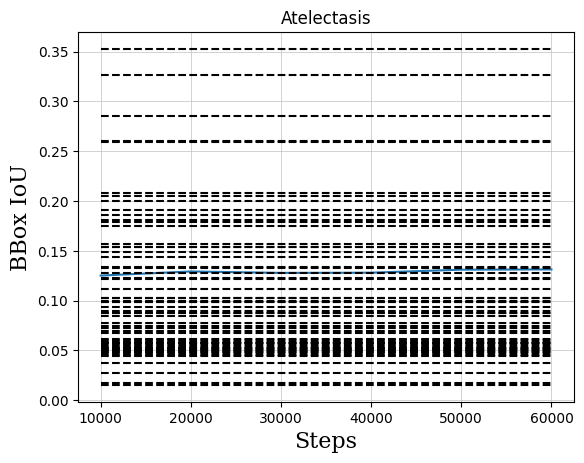

In [3]:
baseline = dataframe_baseline.loc[label_key][viz_metric]

plt.grid(color='silver', linestyle='-', linewidth=.5)
plt.plot(data["steps"], data[viz_metric])
plt.plot(data["steps"], [baseline, ] * len(data["steps"]), "k--")

TO_FONT = {"iou":"IoU", "miou":"mIoU", "bboxiou":"BBox IoU", "bboxmiou":"BBox mIoU", "distance":"Distance", "top1":"Top 1", "aucroc":"AUCROC"}
plt.ylabel(TO_FONT[viz_metric], fontdict=font)
plt.xlabel('Steps', fontdict=font)

plt.title(label_key)
plt.savefig(f'{viz_metric}_{label_key}.pdf', dpi=300, bbox_inches='tight')


Full Results

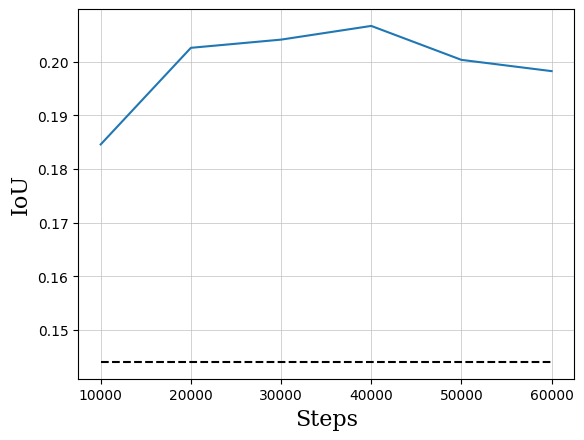

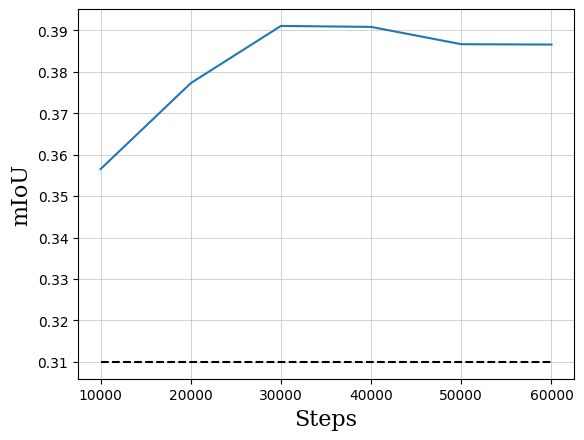

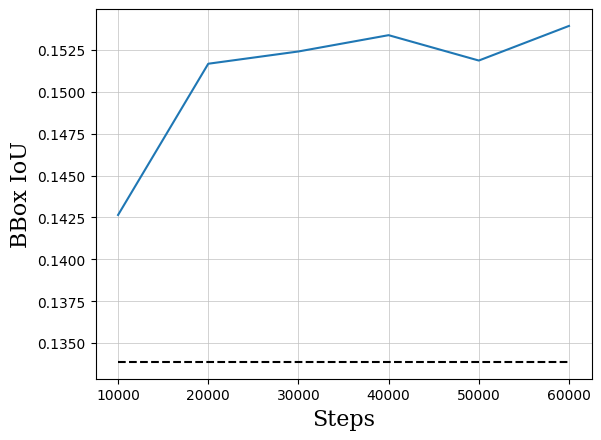

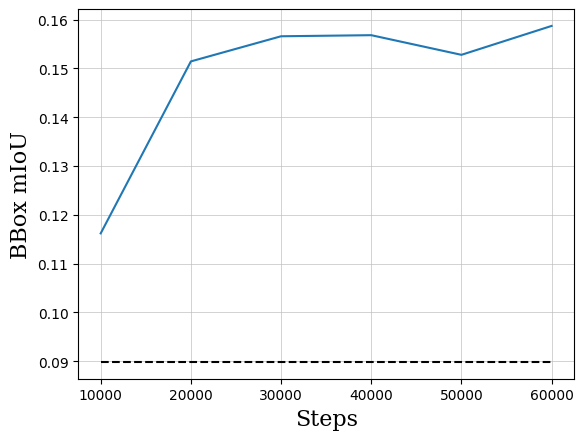

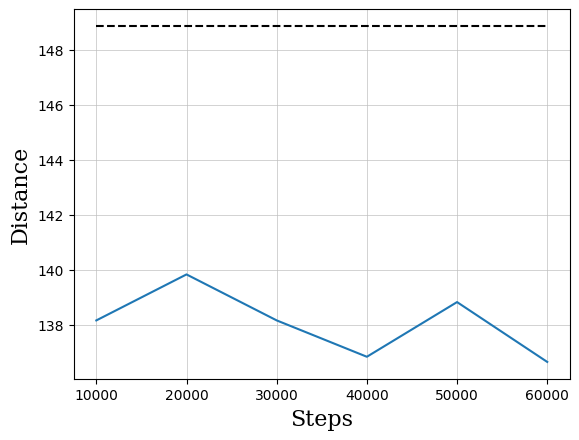

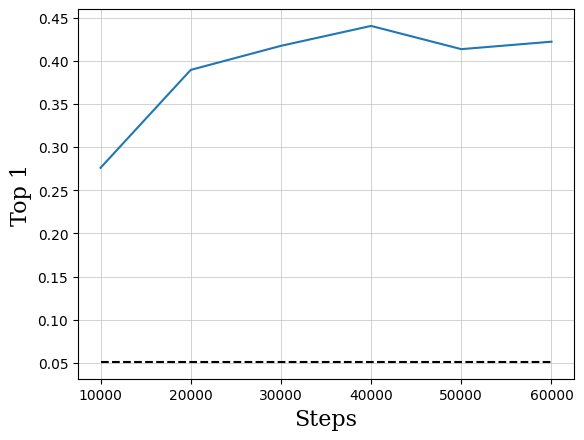

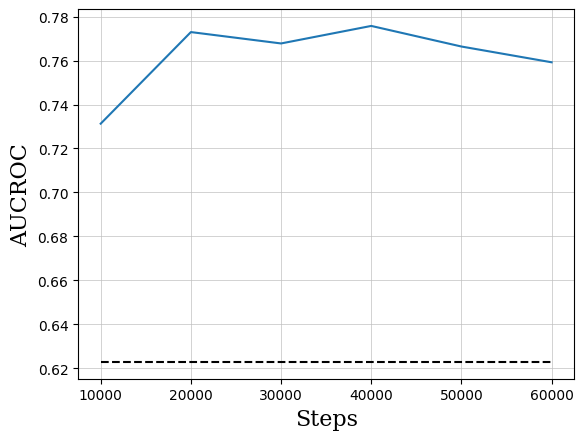

In [4]:
#viz_metric = "iou"
TO_FONT = {"iou":"IoU", "miou":"mIoU", "bboxiou":"BBox IoU", "bboxmiou":"BBox mIoU", "distance":"Distance", "top1":"Top 1", "aucroc":"AUCROC"}
path_to_full_epoch = {k:v.rstrip(".csv") + "_full.csv" for k,v in path_to_epoch.items()}
full_dataframes = {}
for step_num in path_to_epoch.keys():
    full_dataframes[step_num] = pd.read_csv(path_to_full_epoch[step_num], index_col="finding_labels")
    full_dataframes[step_num] = full_dataframes[step_num].drop(["Unnamed: 0", "rel_path"], axis=1)


df_baseline_full = pd.read_csv("notebooks/finetune-sd-train-length/resultsheets/sdv2_full.csv", index_col="finding_labels")

for viz_metric in TO_FONT.keys():
    baseline_full = df_baseline_full.mean()[viz_metric]

    vals = []
    for study_key in study_keys:
        vals.append(full_dataframes[study_key].mean()[viz_metric])

    plt.grid(color='silver', linestyle='-', linewidth=.5)
    plt.plot(data["steps"], vals)
    plt.plot(data["steps"], [baseline_full, ] * len(data["steps"]), "k--")

    plt.ylabel(TO_FONT[viz_metric], fontdict=font)
    plt.xlabel('Steps', fontdict=font)

    #plt.title()
    plt.savefig(f'notebooks/finetune-sd-train-length/{viz_metric}_full_mean.pdf', dpi=300, bbox_inches='tight')
    plt.show()




In [ ]:
df_baseline_full.mean()